In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [8]:
# csv files
csv_files = [
    "Cities.csv",
    "Conferences.csv",
    "MConferenceTourneyGames.csv",
    "MGameCities.csv",
    "MMasseyOrdinals.csv",
    "MNCAATourneyCompactResults.csv",
    "MNCAATourneyDetailedResults.csv",
    "MNCAATourneySeedRoundSlots.csv",
    "MNCAATourneySeeds.csv",
    "MNCAATourneySlots.csv",
    "MRegularSeasonCompactResults.csv",
    "MRegularSeasonDetailedResults.csv",
    "MSampleSubmissionStage1.csv",
    "MSeasons.csv",
    "MSecondaryTourneyCompactResults.csv",
    "MSecondaryTourneyTeams.csv",
    "MTeamCoaches.csv",
    "MTeamConferences.csv",
    "MTeamSpellings.csv",
    "MTeams.csv",
]

# getting the csv files to dataframes
dataframes = list()
for file in csv_files:
    path = "../data/raw/" + file
    df = pd.read_csv(path, encoding="cp1252")
    dataframes.append(df)

# convert to dataframe name
csv_names = " ".join(list(map(lambda x: "df_" + x.split(".")[0], csv_files)))
csv_names

# names are corrected manually
(
    df_Cities,
    df_Conf,
    df_ConfTournGms,
    df_GameCities,
    df_MasseyOrdinals,
    df_NCAATourCR,
    df_NCAATourDR,
    df_NCAATourSeedRoundSlots,
    df_NCAATourSeeds,
    df_NCAATourSlots,
    df_RegSCR,
    df_RegSDR,
    df_SampleSubmissionStage1,
    df_Seasons,
    df_SecTourCR,
    df_SecTourTeams,
    df_TeamCoaches,
    df_TeamConf,
    df_TeamSpellings,
    df_Teams,
) = dataframes

### Selection Sunday is 13 March. 68 teams will be announced than.

### Exploring 2021 Regular Season 

In [9]:
# all division 1 teams for 2021
teams_2021 = df_Teams[
    (df_Teams.LastD1Season >= 2021) & (df_Teams.FirstD1Season <= 2021)
].TeamID.unique()

In [10]:
# seeded teams for 2021
seed_2021 = df_NCAATourSeeds[df_NCAATourSeeds.Season == 2021].TeamID.unique()

In [11]:
# Regular season matches 2021
df_reg_2021 = df_RegSDR[df_RegSDR.Season == 2021].copy()

In [12]:
# number of games played
gp = list(
    map(
        lambda x: df_reg_2021[
            (df_reg_2021.WTeamID == x) | (df_reg_2021.LTeamID == x)
        ].shape[0],
        teams_2021,
    )
)

In [13]:
# number of wins
w = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].shape[0],
        teams_2021,
    )
)

# number of losses
l = np.subtract(gp, w)

In [14]:
# psw = points scored in wins
psw = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WScore.sum(),
        teams_2021,
    )
)

# psl = points scored in losses
psl = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.LTeamID == x)].LScore.sum(),
        teams_2021,
    )
)

# paw = points allowed in wins
paw = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].LScore.sum(),
        teams_2021,
    )
)

# pal = points allowed in losses
pal = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.LTeamID == x)].WFGM.sum(),
        teams_2021,
    )
)

In [15]:
# fgm = field goal made
fgm = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WFGM.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LFGM.sum(),
        teams_2021,
    )
)

# fga = field goad attempts
fga = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WFGA.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LFGA.sum(),
        teams_2021,
    )
)

# fgm3 = 3 points fg made
fgm3 = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WFGM3.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LFGM3.sum(),
        teams_2021,
    )
)

# fga3 = 3 points attempts
fga3 = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WFGA3.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LFGA3.sum(),
        teams_2021,
    )
)

# ftm = free throws made
ftm = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WFTM.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LFTM.sum(),
        teams_2021,
    )
)

# fta = free throw attempts
fta = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WFTA.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LFTA.sum(),
        teams_2021,
    )
)

# orb = offensive rebound
orb = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WOR.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LOR.sum(),
        teams_2021,
    )
)

# drb = defensive rebound
drb = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WDR.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LDR.sum(),
        teams_2021,
    )
)

# ast = assists
ast = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WAst.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LAst.sum(),
        teams_2021,
    )
)

# to = turnover
to = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WTO.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LTO.sum(),
        teams_2021,
    )
)

# stl = steal
stl = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WStl.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LStl.sum(),
        teams_2021,
    )
)

# blk = block
blk = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WBlk.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LBlk.sum(),
        teams_2021,
    )
)

# pf = personal fouls
pf = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WPF.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LPF.sum(),
        teams_2021,
    )
)

In [16]:
# home win percentage
def hpw_calc(TeamID):
    try:
        return (
            df_reg_2021[
                (df_reg_2021.WTeamID == TeamID) & (df_reg_2021.WLoc == "H")
            ].shape[0]
            / df_reg_2021[
                ((df_reg_2021.WTeamID == TeamID) | (df_reg_2021.LTeamID == TeamID))
                & (df_reg_2021.WLoc == "H")
            ].shape[0]
            * 100
        )
    except:
        return 0


hwp = list(map(hpw_calc, teams_2021))

In [42]:
# post-season tournements , pre NCAA tournement
# these games are the most recent before the tournement and they are played with tournement caliber teams
df_ConfTournGms[df_ConfTournGms.Season == 2021]

,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
5308,2021,a_sun,122,1195,1252
5309,2021,a_sun,122,1251,1244
5310,2021,a_sun,122,1391,1468
5311,2021,a_sun,122,1466,1316
5312,2021,a_sun,123,1251,1391
...,...,...,...,...,...
5578,2021,wcc,124,1337,1365
5579,2021,wcc,124,1388,1258
5580,2021,wcc,126,1140,1337
5581,2021,wcc,126,1211,1388


In [17]:
# Regular Season Standings Table
df_lt = pd.DataFrame(
    data=list(
        zip(
            teams_2021,
            gp,
            w,
            l,
            psw,
            psl,
            paw,
            pal,
            fgm,
            fga,
            fgm3,
            fga3,
            ftm,
            fta,
            orb,
            drb,
            ast,
            to,
            stl,
            blk,
            pf,
            hwp,
        )
    ),
    columns=[
        "TeamID",
        "gp",
        "w",
        "l",
        "psw",
        "psl",
        "paw",
        "pal",
        "fgm",
        "fga",
        "fgm3",
        "fga3",
        "ftm",
        "fta",
        "orb",
        "drb",
        "ast",
        "to",
        "stl",
        "blk",
        "pf",
        "hwp",
    ],
)
df_lt["ps"] = (df_lt.psw + df_lt.psl) / df_lt.gp
df_lt["pa"] = (df_lt.paw + df_lt.pal) / df_lt.gp
df_lt["psw"] = df_lt.psw / df_lt.w
df_lt["psl"] = df_lt.psl / df_lt.l
df_lt["paw"] = df_lt.paw / df_lt.w
df_lt["pal"] = df_lt.pal / df_lt.l
df_lt["fgm"] = df_lt.fgm / df_lt.gp
df_lt["fga"] = df_lt.fga / df_lt.gp
df_lt["fgm3"] = df_lt.fgm3 / df_lt.gp
df_lt["fga3"] = df_lt.fga3 / df_lt.gp
df_lt["ftm"] = df_lt.ftm / df_lt.gp
df_lt["fta"] = df_lt.fta / df_lt.gp
df_lt["orb"] = df_lt.orb / df_lt.gp
df_lt["drb"] = df_lt.drb / df_lt.gp
df_lt["ast"] = df_lt.ast / df_lt.gp
df_lt["to"] = df_lt.to / df_lt.gp
df_lt["stl"] = df_lt.stl / df_lt.gp
df_lt["blk"] = df_lt.blk / df_lt.gp
df_lt["pf"] = df_lt.pf / df_lt.gp
df_lt["wp"] = (df_lt.w / df_lt.gp) * 100
df_lt["fgp"] = (df_lt.fgm / df_lt.fga) * 100
df_lt["fgp3"] = (df_lt.fgm3 / df_lt.fga3) * 100
df_lt["mrg"] = df_lt.ps - df_lt.pa

In [32]:
df_lt.sort_values("wp", ascending=False)[
    ["TeamID", "w", "l", "wp", "hwp", "mrg", "fgp"]
].head(30)

,TeamID,w,l,wp,hwp,mrg,fgp
104,1211,26,0,100.000000,100.000000,23.000000,55.086849
342,1457,23,1,95.833333,100.000000,14.291667,46.069720
52,1159,14,1,93.333333,100.000000,21.000000,49.947090
20,1124,22,2,91.666667,91.666667,22.166667,49.306015
114,1222,23,3,88.461538,82.352941,23.692308,43.833017
21,1125,25,4,86.206897,84.615385,20.000000,48.873874
72,1179,23,4,85.185185,85.714286,18.370370,48.797039
250,1361,22,4,84.615385,85.714286,19.038462,45.349627
152,1260,22,4,84.615385,78.571429,21.846154,49.742078
189,1298,15,3,83.333333,88.888889,13.222222,44.764649


<AxesSubplot:>

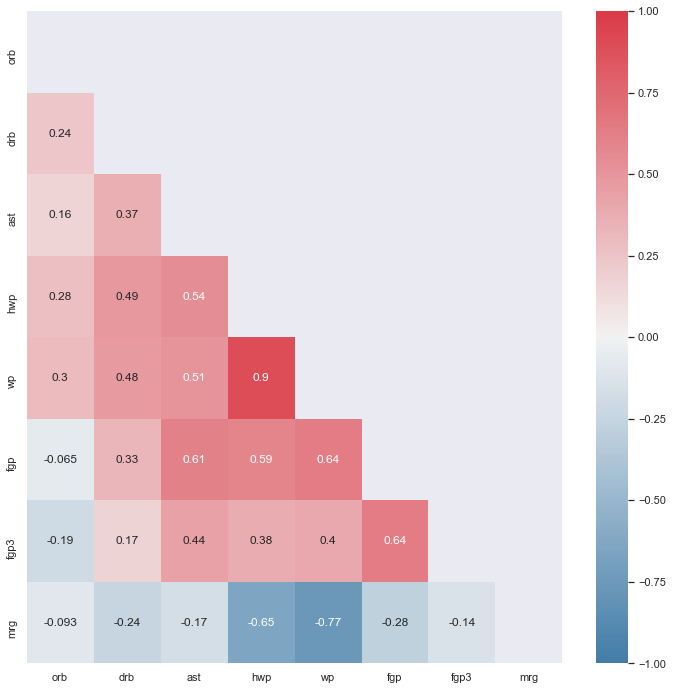

In [19]:
sns.set(rc={"figure.figsize": (12, 12)})
corr = df_lt[["orb", "drb", "ast", "hwp", "wp", "fgp", "fgp3", "mrg"]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap=cmap, annot=True)

In [33]:
df_reg_2021

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
92832,2021,23,1101,70,1190,47,N,0,20,49,...,21,14,17,11,27,5,22,6,2,0
92833,2021,23,1104,81,1240,57,H,0,30,77,...,32,10,17,18,28,10,20,5,2,0
92834,2021,23,1111,81,1354,61,A,0,32,62,...,32,6,11,12,18,12,9,13,0,14
92835,2021,23,1113,94,1348,88,N,0,27,61,...,18,21,35,7,26,14,16,8,2,0
92836,2021,23,1114,71,1341,66,N,0,22,51,...,21,4,4,7,15,14,24,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96682,2021,132,1104,80,1261,79,N,0,33,76,...,27,9,13,15,26,10,5,6,5,13
96683,2021,132,1159,85,1259,72,H,0,31,59,...,22,9,16,12,19,12,12,2,1,13
96684,2021,132,1222,91,1153,54,N,0,37,66,...,33,10,15,14,17,11,10,2,5,12
96685,2021,132,1228,91,1326,88,N,1,29,64,...,25,22,30,8,27,11,8,7,4,26
